# SVM

In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

<img src="svm.png">

Try to generate datasets like this, fit SVM on each of them and find best regularization parameter for each (use CV).

Dataset settings
- 2 features
- not more than 10k points (or you will probably struggle)
- you can either try generating from distributions, and maybe removing some elements after 
- or you can just generate by some functions, this would be easier, but it is OK

# Data 1

In [2]:
X1_1_0 = np.random.normal(2, 3, 5000)
X1_1_1 = np.random.normal(25, 2, 5000)
X1_2_0 = np.random.normal(3, 1, 5000)
X1_2_1 = np.random.normal(3, 2, 5000)
y1 = np.concatenate([np.zeros(5000), np.ones(5000)])

In [3]:
X1 = np.concatenate([np.concatenate([X1_1_0, X1_1_1]).reshape(-1,1), np.concatenate([X1_2_0, X1_2_1]).reshape(-1,1)], axis=1)
np.corrcoef(X1, rowvar=False)

array([[ 1.        , -0.00294616],
       [-0.00294616,  1.        ]])

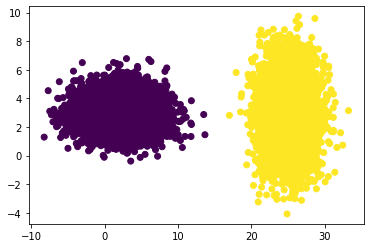

In [4]:
plt.scatter(X1[:,0], X1[:,1], c=y1)
plt.show()

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, shuffle=True, test_size=0.2)

In [6]:
clf1 = SVC(C=1.0, kernel='linear') # degree=3

In [7]:
clf1.fit(X_train1, y_train1)
np.isnan(clf1.predict(X_test1) - y_test1).sum(), clf1.score(X_test1, y_test1)

(0, 1.0)

In [8]:
clf1.intercept_, clf1.coef_

(array([-8.91805783]), array([[0.57202125, 0.06629194]]))

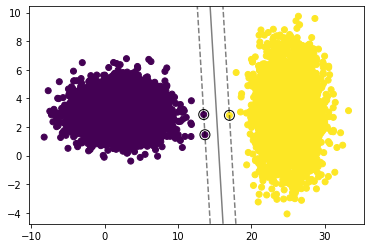

In [9]:
plt.scatter(X1[:,0], X1[:,1], c=y1)
ax = plt.gca()
X1_1_lim = ax.get_xlim()
X1_2_lim = ax.get_ylim()
x1_1 = np.linspace(X1_1_lim[0], X1_1_lim[1], 30)
x1_2 = np.linspace(X1_2_lim[0], X1_2_lim[1], 30)
X1_2, X1_1 = np.meshgrid(x1_2, x1_1)
x1_12 = np.vstack([X1_1.ravel(), X1_2.ravel()]).T
Z = clf1.decision_function(x1_12).reshape(X1_1.shape)

# plot decision boundary and margins
ax.contour(
    X1_1, X1_2, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf1.support_vectors_[:, 0],
    clf1.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# Data 2

In [10]:
X2_0 = np.random.multivariate_normal([2, 6], [[1.1, 0.7], [0.7, 1.1]], 4000)
X2_1 = np.random.multivariate_normal([7, 3], [[1.1, 0.7], [0.7, 1.1]], 4000)
X2 = np.concatenate([X2_0, X2_1])
y2 = np.concatenate([np.zeros(4000), np.ones(4000)])

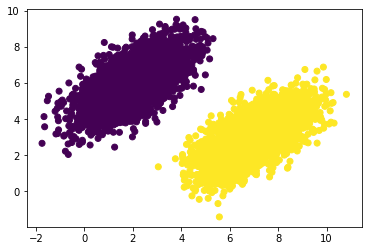

In [11]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.show()

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, shuffle=True, test_size=0.2)

In [13]:
clf2 = SVC(C=1.0, kernel='linear') # degree=3

In [14]:
clf2.fit(X_train2, y_train2)
np.isnan(clf2.predict(X_test2) - y_test2).sum(), clf2.score(X_test2, y_test2)

(0, 1.0)

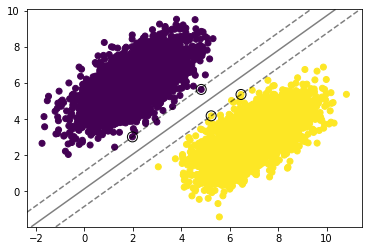

In [15]:
plt.scatter(X2[:,0], X2[:,1], c=y2)
ax = plt.gca()
X2_1_lim = ax.get_xlim()
X2_2_lim = ax.get_ylim()
x2_1 = np.linspace(X2_1_lim[0], X2_1_lim[1], 30)
x2_2 = np.linspace(X2_2_lim[0], X2_2_lim[1], 30)
X2_2, X2_1 = np.meshgrid(x2_2, x2_1)
x2_12 = np.vstack([X2_1.ravel(), X2_2.ravel()]).T
Z = clf2.decision_function(x2_12).reshape(X2_1.shape)

# plot decision boundary and margins
ax.contour(
    X2_1, X2_2, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf2.support_vectors_[:, 0],
    clf2.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# Data 3

In [16]:
X3_1_0 = np.random.normal(2, 3, 5000)
X3_1_1 = np.random.normal(25, 2, 5000)
X3_2_0 = np.random.normal(3, 1, 5000)
X3_2_1 = np.random.normal(3, 2, 5000)
y3 = np.concatenate([np.zeros(4500), np.ones(500), np.ones(5000)])

In [17]:
X3 = np.concatenate([np.concatenate([X3_1_0, X3_1_1]).reshape(-1,1), np.concatenate([X3_2_0, X3_2_1]).reshape(-1,1)], axis=1)
np.corrcoef(X3, rowvar=False)

array([[1.        , 0.01134354],
       [0.01134354, 1.        ]])

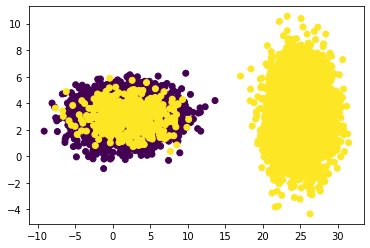

In [18]:
plt.scatter(X3[:,0], X3[:,1], c=y3)
plt.show()

In [19]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, shuffle=True, test_size=0.2)

In [20]:
from sklearn.model_selection import KFold

In [21]:
# # c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 1000]
# c = [0.001, 0.01, 0.1, 1, 10]
# C_F1 = []
# for C_i in c:
#     scores = []
#     clf3 = SVC(C=C_i, kernel='linear', random_state=42)
#     cv = KFold(n_splits=5, random_state=42, shuffle=True)
#     for train_index, test_index in cv.split(X3):
#         X_train3, X_test3, y_train3, y_test3 = X3[train_index], X3[test_index], y3[train_index], y3[test_index]
#         clf3.fit(X_train3, y_train3)
#         scores.append(f1_score(y_test3, clf3.predict(X_test3)))
#         mean_f1 = np.array(scores).mean()
#     C_F1.append(np.array([C_i, mean_f1]))
# C_F1 = np.array(C_F1)
# plt.plot(C_F1[:,0], C_F1[:,1])
# plt.show()

In [22]:
# plt.plot(C_F1[:,0], C_F1[:,1])
# plt.show()

In [23]:
# 0.9848410757946211

In [21]:
clf3 = SVC(C=100, kernel='rbf', random_state=42)
clf3.fit(X_train3, y_train3)
diff = (clf3.predict(X_test3) - y_test3)
X_test3.shape[0], diff[diff==0].shape[0], clf3.score(X_test3, y_test3), f1_score(y_test3, clf3.predict(X_test3))

(2000, 1890, 0.945, 0.9464459591041869)

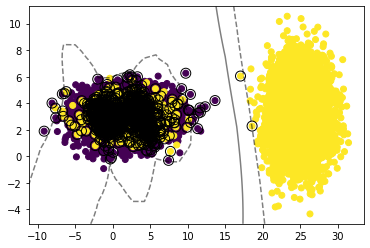

In [22]:
plt.scatter(X3[:,0], X3[:,1], c=y3)
ax = plt.gca()
X3_1_lim = ax.get_xlim()
X3_2_lim = ax.get_ylim()
x3_1 = np.linspace(X3_1_lim[0], X3_1_lim[1], 30)
x3_2 = np.linspace(X3_2_lim[0], X3_2_lim[1], 30)
X3_2, X3_1 = np.meshgrid(x3_2, x3_1)
x3_12 = np.vstack([X3_1.ravel(), X3_2.ravel()]).T
Z = clf3.decision_function(x3_12).reshape(X3_1.shape)

# plot decision boundary and margins
ax.contour(
    X3_1, X3_2, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf3.support_vectors_[:, 0],
    clf3.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# Data 4

[[ 1.         -0.04883333]
 [-0.04883333  1.        ]]


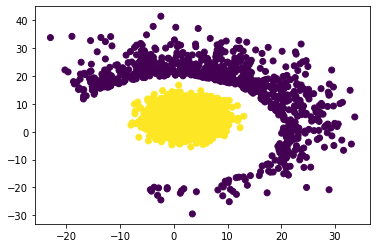

In [23]:
X4_1_0 = np.random.normal(2, 10, 5000)
X4_1_1 = np.random.normal(2, 3, 5000)
X4_2_0 = np.random.normal(5, 10, 5000)
X4_2_1 = np.random.normal(5, 3, 5000)

X4_12_0 = np.concatenate([X4_1_0.reshape(-1,1), X4_2_0.reshape(-1,1)], axis=1)
X4_12_0 = X4_12_0[np.where(np.square(X4_12_0[:, 1]) + np.square(X4_12_0[:, 0]) > 400)]
X4_12_0 = X4_12_0[np.where(X4_12_0[:, 1] + 3*X4_12_0[:, 0] > -40)]

X4_12_1 = np.concatenate([X4_1_1.reshape(-1,1), X4_2_1.reshape(-1,1)], axis=1)
X4_12_1 = X4_12_1[np.where(np.square(X4_12_1[:, 1]) + np.square(X4_12_1[:, 0]) <=400)]

X4 = np.concatenate([X4_12_0, X4_12_1])
y4 = np.concatenate([np.zeros(X4_12_0.shape[0]), np.ones(X4_12_1.shape[0])])

print(np.corrcoef(X4, rowvar=False))

plt.scatter(X4[:,0], X4[:,1], c=y4)
plt.show()

In [24]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, shuffle=True, test_size=0.2)

In [25]:
clf4 = SVC(C=0.5, kernel='poly', random_state=42, degree=2)
clf4.fit(X_train4, y_train4)
diff = (clf4.predict(X_test4) - y_test4)
X_test4.shape[0], diff[diff==0].shape[0], clf4.score(X_test4, y_test4), f1_score(y_test4, clf4.predict(X_test4))

(1153, 1153, 1.0, 1.0)

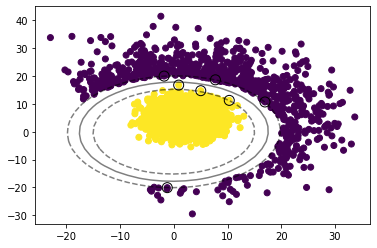

In [26]:
plt.scatter(X4[:,0], X4[:,1], c=y4)
ax = plt.gca()
X4_1_lim = ax.get_xlim()
X4_2_lim = ax.get_ylim()
x4_1 = np.linspace(X4_1_lim[0], X4_1_lim[1], 30)
x4_2 = np.linspace(X4_2_lim[0], X4_2_lim[1], 30)
X4_2, X4_1 = np.meshgrid(x4_2, x4_1)
x4_12 = np.vstack([X4_1.ravel(), X4_2.ravel()]).T
Z = clf4.decision_function(x4_12).reshape(X4_1.shape)

# plot decision boundary and margins
ax.contour(
    X4_1, X4_2, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf4.support_vectors_[:, 0],
    clf4.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()